In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Dataset_ML/test_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
TestPath = '/tmp/Test'

In [ ]:

# Import reuqired libraries
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from matplotlib import image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, MaxPooling2D, PReLU, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomHeight, RandomWidth

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Define path to your test dataset and model
test_path = '/tmp/test_data'
model_path = '/content/drive/MyDrive/final_model/final_model.h5'

# Load your pre-trained model
model = load_model(model_path)

# Preparing the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False)

# Function to predict in larger batches
def predict_in_batches(generator, model):
    predictions = model.predict(generator, steps=len(generator))
    return predictions

# Predicting in batches
predictions = predict_in_batches(test_generator, model)

# Top-N Accuracy Function
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=1)[:, -n:]
    successes = 0
    for i in range(len(truths)):
        if truths[i] in best_n[i, :]:
            successes += 1
    return float(successes) / len(truths)

# Calculating Top-N Accuracy for the entire dataset
top_n = 3  # Adjust as needed
top_n_accuracy_value = top_n_accuracy(predictions, test_generator.classes, top_n)

print(f"Top-{top_n} Accuracy: {top_n_accuracy_value * 100:.2f}%")


Found 8000 images belonging to 4000 classes.
500/500 [==============================] - 37s 59ms/step
Top-3 Accuracy: 58.85%


In [ ]:
from sklearn.metrics import confusion_matrix

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# True class indices
true_classes = test_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate accuracy for each class
class_accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
average_accuracy_per_class = np.mean(class_accuracies)

print(f"Average Accuracy Per Class: {average_accuracy_per_class * 100:.2f}%")


Average Accuracy Per Class: 43.18%


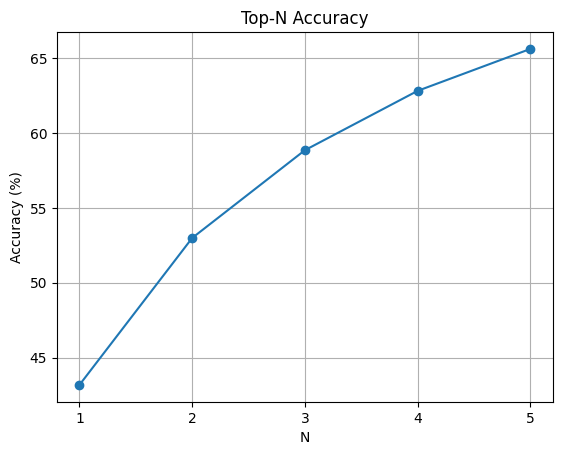

In [ ]:
# Calculate Top-N Accuracy for different values of N
top_n_values = [1, 2, 3, 4, 5]  # Adjust as needed
accuracy_values = []

for top_n in top_n_values:
    top_n_accuracy_value = top_n_accuracy(predictions, test_generator.classes, top_n)
    accuracy_values.append(top_n_accuracy_value * 100)

# Plotting the Top-N Accuracy Graph
plt.plot(top_n_values, accuracy_values, marker='o', linestyle='-')
plt.title('Top-N Accuracy')
plt.xlabel('N')
plt.ylabel('Accuracy (%)')
plt.xticks(top_n_values)
plt.grid(True)
plt.show()

Found 8000 images belonging to 4000 classes.
500/500 [==============================] - 28s 55ms/step
Top-1 Accuracy: 43.18%
Top-2 Accuracy: 52.99%
Top-3 Accuracy: 58.85%
Top-4 Accuracy: 62.81%
Top-5 Accuracy: 65.61%


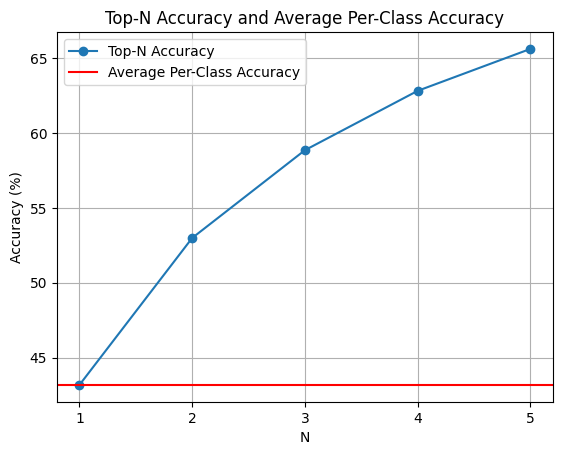

Average Accuracy Per Class: 43.18%


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Define path to your test dataset and model
test_path = '/tmp/test_data'
model_path = '/content/drive/MyDrive/final_model/final_model.h5'

# Load your pre-trained model
model = load_model(model_path)

# Preparing the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False)

# Function to predict in larger batches
def predict_in_batches(generator, model):
    predictions = model.predict(generator, steps=len(generator))
    return predictions

# Function to calculate Top-N Accuracy
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=1)[:, -n:]
    successes = 0
    for i in range(len(truths)):
        if truths[i] in best_n[i, :]:
            successes += 1
    return float(successes) / len(truths)

# Predicting in batches
predictions = predict_in_batches(test_generator, model)

# Calculate Top-N Accuracy for different values of N and Average Accuracy Per Class
top_n_values = [1, 2, 3, 4, 5]  # Adjust as needed
accuracy_values = []
average_accuracy_per_class = 0

for top_n in top_n_values:
    top_n_accuracy_value = top_n_accuracy(predictions, test_generator.classes, top_n)
    accuracy_values.append(top_n_accuracy_value * 100)
    print(f"Top-{top_n} Accuracy: {top_n_accuracy_value * 100:.2f}%")

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# True class indices
true_classes = test_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate accuracy for each class
class_accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
average_accuracy_per_class = np.mean(class_accuracies) * 100

# Plotting the Top-N Accuracy Graph
plt.plot(top_n_values, accuracy_values, marker='o', linestyle='-', label='Top-N Accuracy')
plt.axhline(y=average_accuracy_per_class, color='r', linestyle='-', label='Average Per-Class Accuracy')
plt.title('Top-N Accuracy and Average Per-Class Accuracy')
plt.xlabel('N')
plt.ylabel('Accuracy (%)')
plt.xticks(top_n_values)
plt.legend()
plt.grid(True)
plt.show()

# Print Average Accuracy Per Class
print(f"Average Accuracy Per Class: {average_accuracy_per_class:.2f}%")
